# Probabilistic models for logistic regression

Binary logistic regression predicts the probability of positive class:

$$
    \mathbb P(y = 1 \vert \boldsymbol x,  \boldsymbol w) = \sigma(\boldsymbol x^{\mathsf T} \boldsymbol w), \quad \sigma(t) = \frac 1{1 + e^{-t}}.
$$

**Q**. What is the probability of negative class $\mathbb P(y = 0 \vert \boldsymbol x,  \boldsymbol w)$?

It follows that

$$
p(y \vert \boldsymbol x,  \boldsymbol w) = \mathrm{Bern}(\sigma(\boldsymbol x^{\mathsf T} \boldsymbol w))
$$





```{dropdown} Show answer
$$
   p(y \vert \boldsymbol x,  \boldsymbol w) = \frac 1{1 + e^{-(x^{T})w}}.
$$
```


**Q**. What is $p(y \vert \boldsymbol x,  \boldsymbol w)$ if $y \in\{-1, +1\}$?

```{dropdown} Show answer
$$
   p(y=1 \vert \boldsymbol x,  \boldsymbol w) = \frac 1{1 + e^{-(x^{T}w)}}.
$$
$$
   p(y=-1 \vert \boldsymbol x,  \boldsymbol w) = \frac 1{1 + e^{(x^{T}w)}}.
$$
```

## MLE
Maximum Likelihood Estimation (MLE) is a statistical method for estimating the parameters of a probability distribution that best explain the observed data. MLE does this by maximizing the likelihood function. MLE is a parameter estimation technique rather than a classification algorithm.

Considering the probability values are very dense that lie between 0 and 1, creating a product would not be mathematically easier or feasible.

Taking the logarithm, on the other hand, allows us to convert the product of probabilities in the likelihood function into a sum of logarithms, which is generally easier to work with, and we named this Log Likelihood.


![Resized Image](./f1.webp)

### Binary case

Note that if $\xi \sim \mathrm{Bern}(q)$ then $\mathbb P(\xi = t) = q^{t} (1-q)^{1-t}$.
Denote $\widehat y_i = \sigma(\boldsymbol x_i^{\mathsf T} \boldsymbol w)$ and write down the negative log-likelihood:

![Binary Case Image](./binary_scheme.png)

$$
    \begin{multline*}
    \mathrm{NLL}(\boldsymbol w) = -\sum_{i=1}^n \log p(y_i \vert \boldsymbol x_i, \boldsymbol w) = -\sum_{i=1}^n \log\big(\widehat y_i^{y_i} (1 - \widehat y_i)^{1 - y_i}\big) = \\
    -\sum_{i=1}^n y_i\log(\widehat y_i) + (1-y_i) \log(1 - \widehat y_i).
    \end{multline*}
$$

This is exactly the binary cross-entropy loss between true labels $y_i$ and predictions $\widehat y_i$.

In [14]:
import numpy as np
import plotly.graph_objs as go
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate synthetic data with two features
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Fit a Support Vector Machine (SVM) classifier
classifier = SVC(kernel='linear', C=1)
classifier.fit(X, y)

# Create a meshgrid for plotting the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get predictions for each point in the meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a trace for the decision boundary
trace_decision_boundary = go.Contour(x=np.arange(x_min, x_max, h),
                                     y=np.arange(y_min, y_max, h),
                                     z=Z,
                                     contours=dict(coloring='lines'),
                                     line=dict(width=2),
                                     colorscale=[[0, 'rgba(255, 255, 255, 0)'], [1, 'rgba(0, 0, 0, 0)']],
                                     showscale=False)

# Create a trace for the data points
trace_data_points = go.Scatter(x=X[:, 0],
                               y=X[:, 1],
                               mode='markers',
                               marker=dict(color=y, colorscale='Viridis', size=8, line=dict(color='black', width=0.5)),
                               showlegend=False)

# Create layout
layout = go.Layout(title='SVM Decision Boundary (One vs One)',
                   xaxis=dict(title='Feature 1'),
                   yaxis=dict(title='Feature 2'))

# Create figure
fig = go.Figure(data=[trace_decision_boundary, trace_data_points], layout=layout)

# Show the interactive plot
fig.show()

**Q**.

### Multinomial case
We sometimes require more than two classes. Perhaps we should do a three-way sentiment classification (positive, negative, or neutral). Alternatively, we could name the entity type of a phrase (choosing from tags such as person, location, and organization).

In such cases, multinomial logistic regression, also known as softmax regression, is used. In multinomial logistic regression, we want to assign a class k from a set of K classes to each observation, with the constraint that only one of these classes is correct.
![Multinomial Case Image](./multinomial_scheme.png)



Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.

Suppose that $\mathcal Y = \{1, \ldots, K\}$, then prediction on a sample $\boldsymbol x \in \mathbb R^d$ is a vector of probabilities 

$$
    \boldsymbol{\widehat y} = \mathrm{Softmax}(\boldsymbol x^{\mathsf T} \boldsymbol W), \quad \boldsymbol W \in \mathbb R^{d\times K}.
$$

Thus,

$$
    p(\boldsymbol y \vert \boldsymbol X, \boldsymbol W) = \mathrm{Cat}(\mathrm{Softmax}(\boldsymbol X \boldsymbol W)),
$$

where $\mathrm{Cat}(\boldsymbol p)$ is **categorical** (or **multinoully**) distribution over categories $\{1, \ldots, K\}$.

In [13]:
import numpy as np
import plotly.graph_objects as go
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset with 4 classes
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=4, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model for each pair of classes using OneVsOneClassifier
clf_ovo = OneVsOneClassifier(LogisticRegression())
clf_ovo.fit(X_train, y_train)

# Create a meshgrid for the decision boundaries
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_ovo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create an interactive scatter plot
fig = go.Figure()

# Add a scatter plot for training points
fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers',
                         marker=dict(color=y, colorscale='Viridis', size=10, line=dict(color='black', width=1)),
                         name='Training Points'))

# Add decision boundaries as contours
fig.add_trace(go.Contour(x=np.arange(x_min, x_max, h), y=np.arange(y_min, y_max, h), z=Z,
                         colorscale='Viridis', showscale=False, opacity=0.7,
                         name='Decision Boundaries'))

# Customize layout
fig.update_layout(title='Multinomial Classification (Interactive)',
                  xaxis_title='Feature 1',
                  yaxis_title='Feature 2',
                  legend=dict(x=0.85, y=0.9, traceorder='reversed'),
                  hovermode='closest')

# Show the interactive plot
fig.show()

#### Negatibe Log Likelihood
Taking the logarithmic of probabilities value, which is between 0 and 1, however, will always return negative values.

So, in order to have positive values, we multiply it by -1, yielding the negative log-likelihood.

The NLL cost function can become non-convex in more complex models, such as deep neural networks with multiple layers and non-linear activations.

To minimize it, we must use the partial derivation of the log loss function or negative log likelihood. Both are the same.
Now write the negative log-likelihood:
$$
\mathrm{NLL}(\boldsymbol W) = -\log\prod_{i=1}^n \prod_{k=1}^K \widehat y_{ik}^{y_{ik}} = -\sum\limits_{i=1}^n \sum_{k=1}^K  y_{ik} \log \widehat y_{ik}.
$$

This is cross-entropy loss.

## MAP
The maximum aposteriori (MAP) approximation chooses the parameters which are most likely under
the posterior.

Consider binary case. As for linear regression, use gaussian prior:

$$
    p(\boldsymbol w) = \mathcal N(\boldsymbol 0, \tau^2\boldsymbol I).
$$

Then 

$$
-\log p(\boldsymbol w \vert \boldsymbol X, \boldsymbol y) = -\sum_{i=1}^n \big(y_i\log(\widehat y_i) + (1-y_i) \log(1 - \widehat y_i)\big) +  \frac 1{2\tau^2} \sum\limits_{j=1}^d w_j^2,
$$

where $\widehat y_i = \sigma(\boldsymbol x_i^{\mathsf T} \boldsymbol w)$. Hence,

$$
\boldsymbol {\widehat w}_{\mathrm{MAP}} = \arg\min\limits_{\boldsymbol w}
\bigg(-\sum\limits_{i=1}^n \big(y_i\log(\widehat y_i) + (1-y_i) \log(1 - \widehat y_i)\big)+ \frac{1}{2\tau^2} \Vert \boldsymbol w \Vert_2^2\bigg).
$$

This is $L_2$-regularization of the binary logistic regression. Taking laplacian prior as {ref}`here <laplace-prior>`, we obtain $L_1$ regularization.

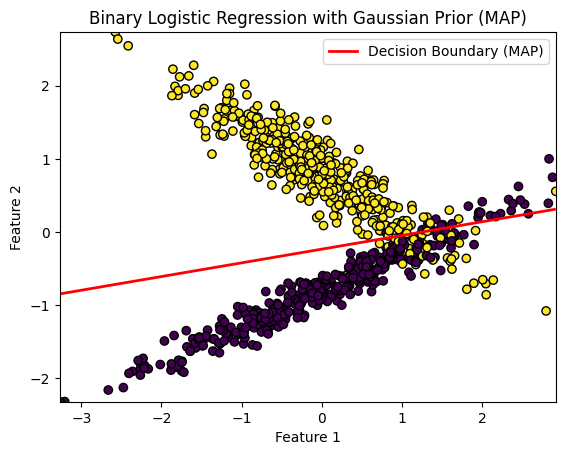

In [17]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a bias term to the features
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]

# Logistic function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Negative log likelihood function (assuming Gaussian prior)
def neg_log_likelihood(theta, X, y, prior_variance=1):
    n = len(y)
    y_pred = sigmoid(np.dot(X, theta))
    likelihood = y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)
    prior = (1 / (2 * prior_variance)) * np.dot(theta[1:], theta[1:])
    return -np.sum(likelihood) - prior

# Find MAP estimate using optimization
initial_theta = np.zeros(X_train_bias.shape[1])
result = minimize(neg_log_likelihood, initial_theta, args=(X_train_bias, y_train), method='L-BFGS-B')

# Extract MAP estimate
map_estimate = result.x

# Plot the data points and the decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='k', marker='o', label='Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the decision boundary based on the MAP estimate
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100),
                     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100))

# Add a bias term to the meshgrid
X_mesh = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]

# Note: Use map_estimate instead of map_estimate[1:]
Z = sigmoid(np.dot(X_mesh, map_estimate))
Z = Z.reshape(xx.shape)

# Plot the decision boundary with a custom legend entry
contour = plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='red')
custom_legend_entry = Line2D([0], [0], color='red', linewidth=2, label='Decision Boundary (MAP)')
plt.legend(handles=[custom_legend_entry])

plt.title('Binary Logistic Regression with Gaussian Prior (MAP)')
plt.show()

**Q**.

<span style="display:none" id="q3">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyBhIHJhbmdlIHZhbHVlIG9mIFNvZnRtYXg/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJbLTEgLCAwXSIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QifSwgeyJhbnN3ZXIiOiAiWzAgLCAxXSIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QuIn0sIHsiYW5zd2VyIjogIlstXHUyMjFlLCArXHUyMjFlXSIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QifV19XQ==</span>

In [19]:
from jupyterquiz import display_quiz
display_quiz("#q3")

<IPython.core.display.Javascript object>